# Введение в CausalImpact

CasualImpact - это метод, позволяющий оценить влияние дискретного события на временной ряд в условиях невозможности А/Б тестинга. Подход основан на том, что для интересующего ряда находятся другие временные ряды, которые с ним хорошо коррелируют. По этим рядам для интересующего ряда строится прогноз с момента, когда случилось внешнее событие. По различию прогноза и реального ряда рассчитывается эффект внешнего события.

Ряд, для которого измеряется эффект, далее называется рядом-таргетом. Ряды, по которым строится прогноз, называются ряды-предикторы.

Для прастического применения данного метода удобен пакет от Google с аналогичным названием.

## Установка CausalImpact

In [13]:
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/3.4/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘highr’, ‘markdown’, ‘yaml’, ‘backports’, ‘purrr’, ‘tidyselect’, ‘knitr’, ‘checkmate’, ‘htmlwidgets’, ‘tidyr’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘htmltools’, ‘base64enc’



In [4]:
library(CausalImpact)

## Пример использования

Создание модельных данных

In [5]:
?CausalImpact

In [6]:
?cbind

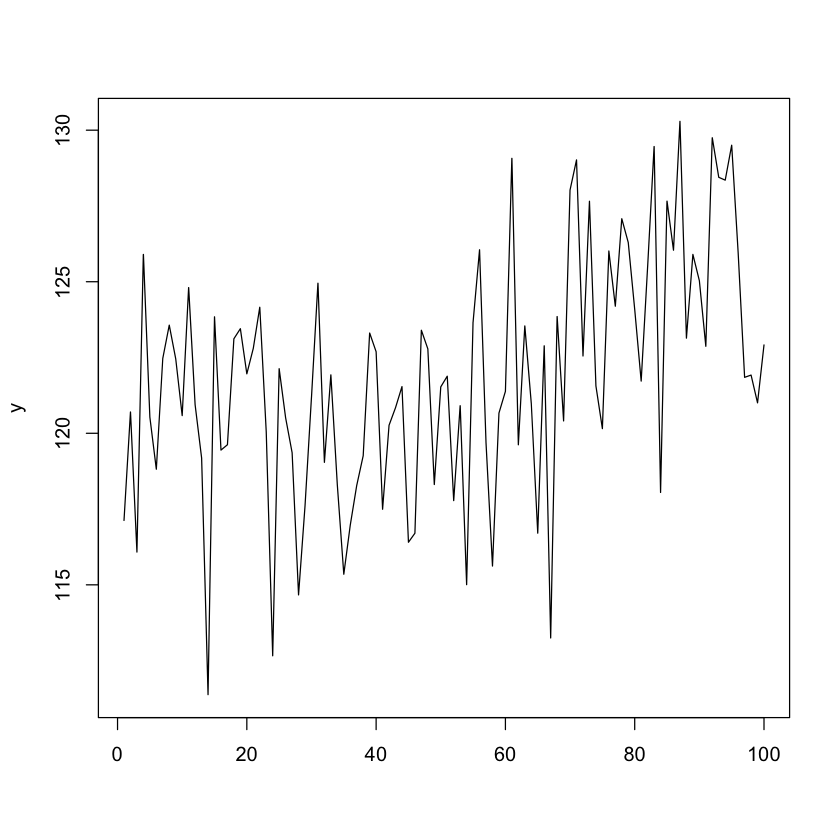

In [8]:
set.seed(1)
x1 <- 100 + 3*arima.sim(model = list(1,2,0), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 5
data <- cbind(y, x1)
matplot(y, type = "l")

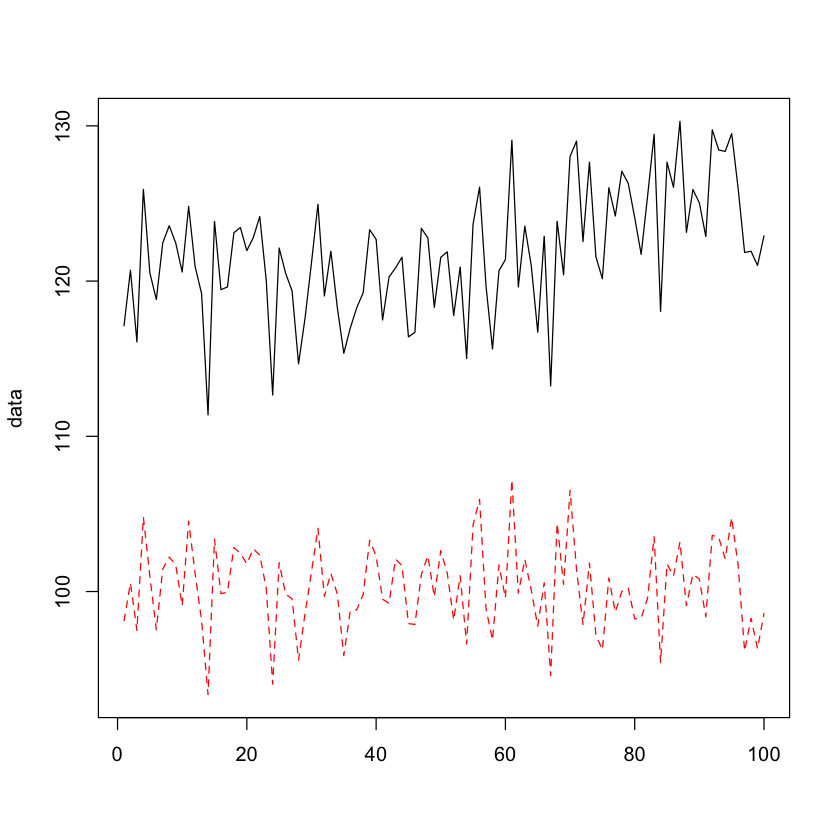

In [9]:
matplot(data, type = "l")

Оценка воздействия

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

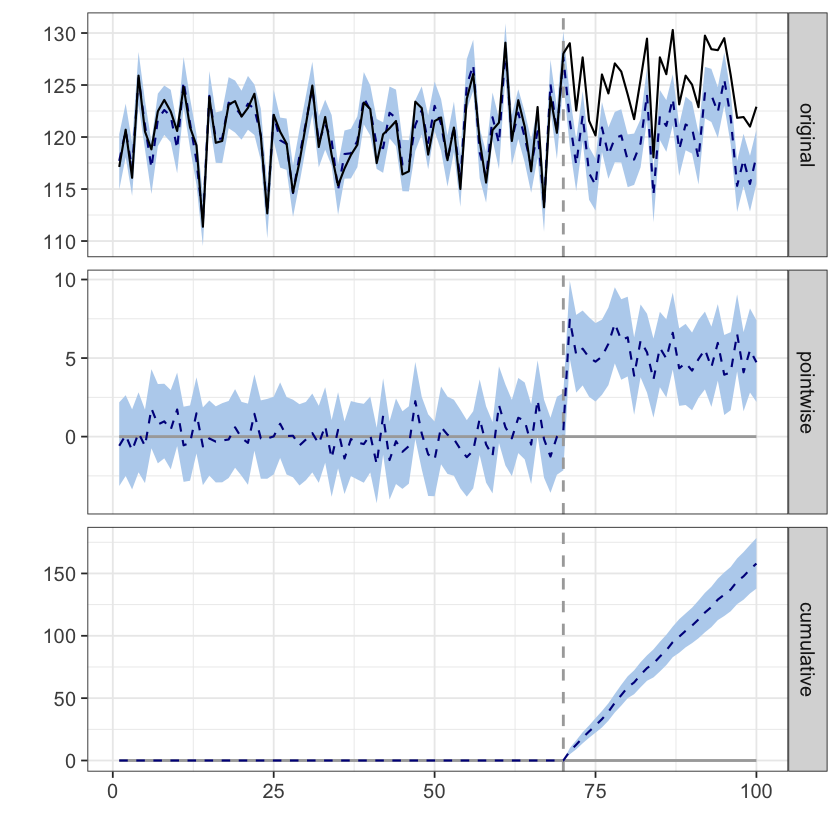

In [10]:
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)

In [12]:
summary(impact)

Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   125            3754          
Prediction (s.d.)        120 (0.35)     3596 (10.38)  
95% CI                   [119, 121]     [3576, 3616]  
                                                      
Absolute effect (s.d.)   5.3 (0.35)     157.9 (10.38) 
95% CI                   [4.6, 5.9]     [137.8, 178.4]
                                                      
Relative effect (s.d.)   4.4% (0.29%)   4.4% (0.29%)  
95% CI                   [3.8%, 5%]     [3.8%, 5%]    

Posterior tail-area probability p:   0.001
Posterior prob. of a causal effect:  99.9%

For more details, type: summary(impact, "report")



In [13]:
summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 125.13. By contrast, in the absence of an intervention, we would have expected an average response of 119.87. The 95% interval of this counterfactual prediction is [119.18, 120.54]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 5.26 with a 95% interval of [4.59, 5.95]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 3.75K. By contrast, had the intervention not taken place, we would have expected a sum of 3.60K. The 95% interval of this prediction is [3.58K, 3.62K].

The above results are given in terms of absolute numbers. In relative terms, the response variable sh

Проверка модели на "спокойном" периоде

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 30 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average           Cumulative     
Actual                   121               3620           
Prediction (s.d.)        121 (0.35)        3623 (10.53)   
95% CI                   [120, 121]        [3602, 3643]   
                                                          
Absolute effect (s.d.)   -0.1 (0.35)       -3.0 (10.53)   
95% CI                   [-0.77, 0.6]      [-23.06, 18.1] 
                                                          
Relative effect (s.d.)   -0.084% (0.29%)   -0.084% (0.29%)
95% CI                   [-0.64%, 0.5%]    [-0.64%, 0.5%] 

Posterior tail-area probability p:   0.389
Posterior prob. of a causal effect:  61%

For more details, type: summary(impact, "report")



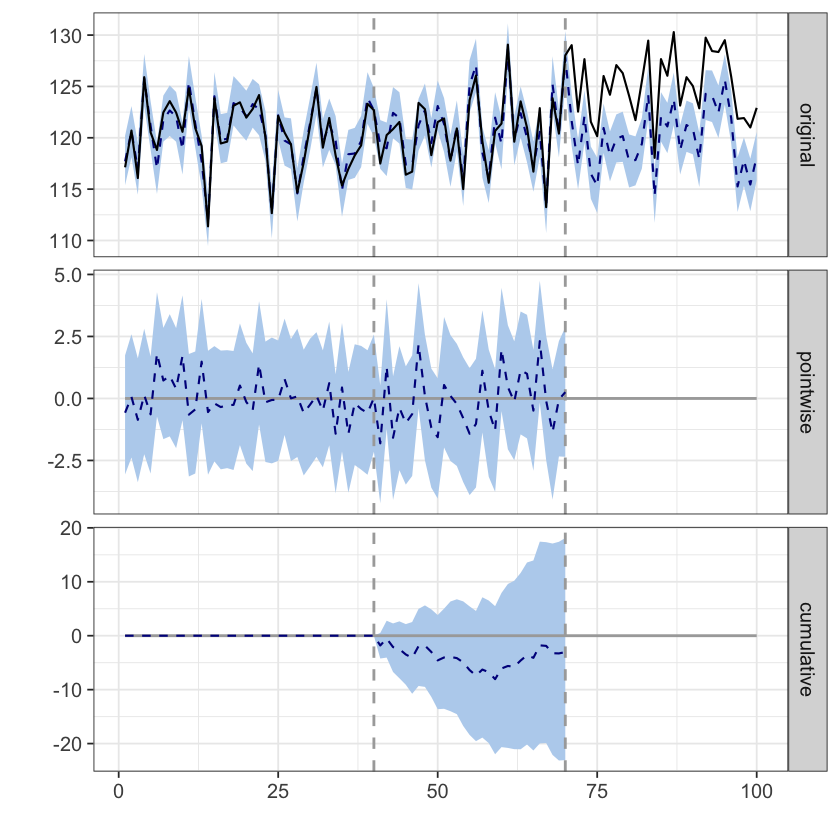

In [14]:
pre.period <- c(1, 40)
post.period <- c(41, 70)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

Кастомная модель

In [10]:
?CausalImpact

In [11]:
?bsts

=-=-=-=-= Iteration 0 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 100 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 200 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 300 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 400 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 500 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 600 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 700 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 800 Mon Oct 09 17:42:18 2017
 =-=-=-=-=
=-=-=-=-= Iteration 900 Mon Oct 09 17:42:18 2017
 =-=-=-=-=


Warning message:
"Removed 100 rows containing missing values (geom_path)."Warning message:
"Removed 200 rows containing missing values (geom_path)."

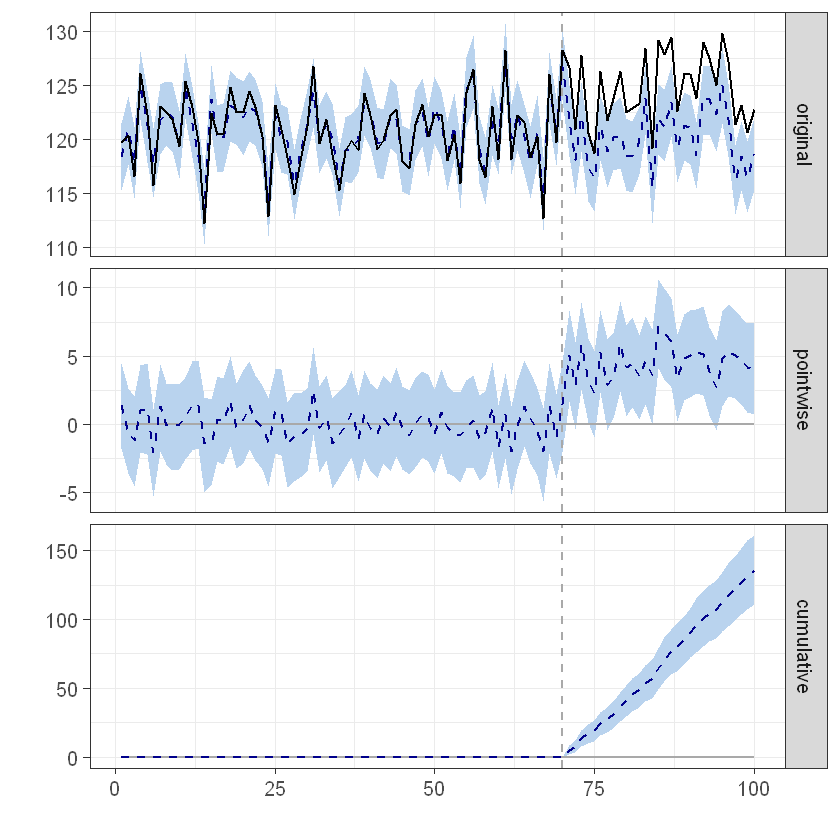

In [12]:
pre.period <- c(1, 70)
post.period <- c(71, 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 5

post.period.response <- y[post.period[1] : post.period[2]]
y[post.period[1] : post.period[2]] <- NA
ss <- AddLocalLevel(list(), y)
bsts.model <- bsts(y ~ x1, ss, niter = 1000)
impact <- CausalImpact(bsts.model = bsts.model, post.period.response = post.period.response)
plot(impact)

## Примеры результатов применения модели

Хорошо ли реализован подход CausalImpact в данных примерах?

Пример 1.
![Image 1](real_case_1.png)

Пример 2.
![Image 2](real_case_2.png)

Пример 3.
![Image 3](real_case_3.png)

Пример 4.
![Image 4](real_case_4.png)